In [1]:
import pandas as pd
import os

In [7]:
import numpy as np
def compute_results(df):
    correctness = 0
    sc_correctness = 0
    judge_correctness = 0
    rerailer_correctness = 0
    for row_index in range(len(df)):
        row = df.iloc[row_index]
        correct_ans = row['Correct_Answer'].lower()
        output_answer = row['Cot_random_answer'].lower()
        sc_answer = row['Smv_Answer'].lower()
        judge_answer = row['Output_Answer'].lower()
        rerailer_ans = row['Corrected COT Answer'].lower()
        if correct_ans == output_answer[0]:
            correctness += 1
        else:
            correctness += 0
        if correct_ans == sc_answer[0]:
            sc_correctness += 1
        else:
            sc_correctness += 0
        if correct_ans == judge_answer[0]:
            judge_correctness += 1
        else:
            judge_correctness += 0
        if correct_ans == rerailer_ans[0]:
            rerailer_correctness += 1
        else:
            rerailer_correctness += 0
    
    result_dict={
        'CoT':round(correctness/len(df),3),
        'SC':round(sc_correctness/len(df),3),
        # 'Derailer':round(judge_correctness/len(df),3),
        'Rerailer':round(rerailer_correctness/len(df),3)
    }
    return result_dict

In [8]:
df_3 = pd.read_csv('../result/gpt3.5_results.csv')
df_4 = pd.read_csv('../result/gpt4_results.csv')
df_claude = pd.read_csv('../result/claude_results.csv')

In [46]:
df_3.Category.value_counts()

Category
Math                        295
Challenging Math            288
disambiguation_qa           200
elementary_mathematics       99
jurisprudence                99
date_understanding           99
professional_law             99
college_biology              98
international_law            98
high_school_statistics       97
philosophy                   96
business_ethics              96
college_physics              96
college_computer_science     96
electrical_engineering       96
abstract_algebra             95
college_medicine             94
professional_accounting      91
college_chemistry            83
college_mathematics          81
formal_logic                 78
Name: count, dtype: int64

In [51]:
category_mapping = {
    'Math': ['Math', 'elementary_mathematics', 'high_school_statistics', 'abstract_algebra', 'formal_logic'],
    'Advanced Math and Science': ['Challenging Math', 'college_biology', 'college_physics', 'college_medicine', 'college_chemistry', 'college_mathematics','college_computer_science', 'electrical_engineering','professional_accounting'],
    'Commonsense Reasoning': ['disambiguation_qa', 'jurisprudence', 'date_understanding', 'professional_law', 'international_law', 'philosophy', 'business_ethics']
}
reverse_mapping = {}
for new_cat, old_cats in category_mapping.items():
    for old_cat in old_cats:
        reverse_mapping[old_cat] = new_cat

# Map the old categories to new categories
df_3['Big_Category'] = df_3['Category'].map(reverse_mapping)
df_claude['Big_Category'] = df_claude['Category'].map(reverse_mapping)
df_4['Big_Category'] = df_4['Category'].map(reverse_mapping)

In [54]:
results_li = []
result = compute_results(df_3)
result['Model'] = 'gpt-3.5-turbo'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_3.Big_Category.tolist()):
    df_temp = df_3[df_3['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-3.5-turbo'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_3 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','Rerailer']]
df_result_3

,Category,Model,CoT,SC,Rerailer
0,all,gpt-3.5-turbo,0.675,0.692,0.730
1,Advanced Math and Science,gpt-3.5-turbo,0.669,0.690,0.745
2,Commonsense Reasoning,gpt-3.5-turbo,0.727,0.738,0.740
3,Math,gpt-3.5-turbo,0.625,0.640,0.694


In [55]:
results_li = []
result = compute_results(df_claude)
result['Model'] = 'claude-3-sonnet'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_claude.Big_Category.tolist()):
    df_temp = df_claude[df_claude['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'claude-3-sonnet'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_claude = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','Rerailer']]
df_result_claude

,Category,Model,CoT,SC,Rerailer
0,all,claude-3-sonnet,0.686,0.705,0.722
1,Advanced Math and Science,claude-3-sonnet,0.683,0.706,0.729
2,Commonsense Reasoning,claude-3-sonnet,0.718,0.736,0.757
3,Math,claude-3-sonnet,0.652,0.667,0.669


In [56]:
results_li = []
result = compute_results(df_4)
result['Model'] = 'gpt-4'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_4.Big_Category.tolist()):
    df_temp = df_4[df_4['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-4'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_4 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','Rerailer']]
df_result_4

,Category,Model,CoT,SC,Rerailer
0,all,gpt-4,0.694,0.711,0.748
1,Advanced Math and Science,gpt-4,0.680,0.701,0.759
2,Commonsense Reasoning,gpt-4,0.728,0.740,0.760
3,Math,gpt-4,0.675,0.690,0.716


<Figure size 1600x800 with 0 Axes>

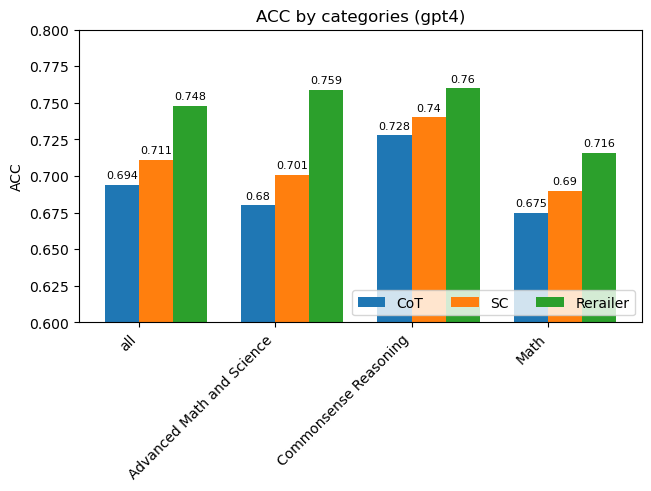

<Figure size 1600x800 with 0 Axes>

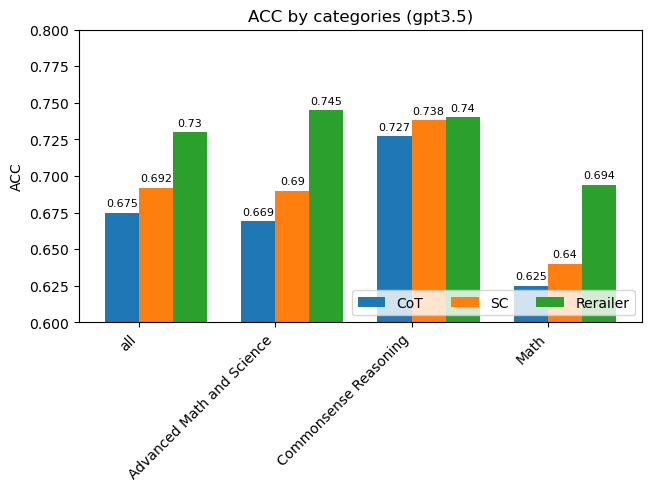

<Figure size 1600x800 with 0 Axes>

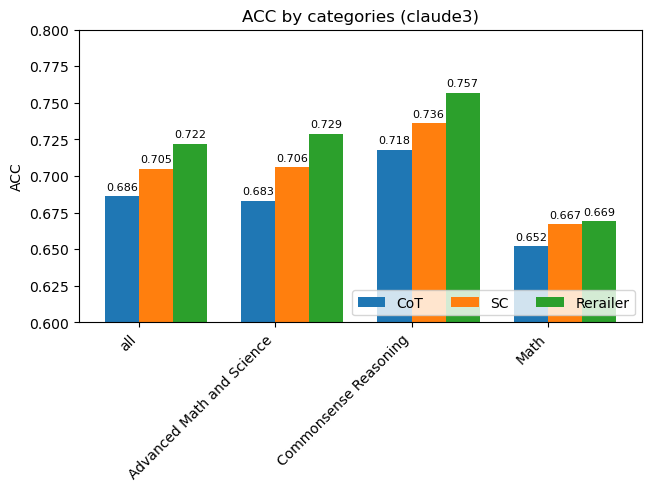

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def get_plot(df, model,chunk_size=4):
    categories = tuple(df.Category.tolist())
    result = {'CoT': tuple(df.CoT.tolist()),
              'SC': tuple(df.SC.tolist()),
              'Rerailer': tuple(df.Rerailer.tolist()),
              # Add more columns here if needed
              }

    num_categories = len(categories)
    num_chunks = (num_categories + chunk_size - 1) // chunk_size  # Calculate number of chunks
    width = 0.25  # the width of the bars

    for chunk in range(num_chunks):
        start_idx = chunk * chunk_size
        end_idx = min(start_idx + chunk_size, num_categories)

        chunk_categories = categories[start_idx:end_idx]
        chunk_result = {k: v[start_idx:end_idx] for k, v in result.items()}
        x = np.arange(len(chunk_categories))  # the label locations

        plt.figure(figsize=(16, 8))
        fig, ax = plt.subplots(layout='constrained')

        multiplier = 0
        for attribute, measurement in chunk_result.items():
            offset = width * multiplier
            rects = ax.bar(x + offset, measurement, width, label=attribute)
            ax.bar_label(rects, padding=3,fontsize =8)
            multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('ACC')
        ax.set_title(f'ACC by categories ({model})')
        ax.set_xticks(x + width / 2)
        ax.set_xticklabels(chunk_categories, rotation=45, ha='right')  # Rotate x-axis labels
        ax.legend(loc='lower right', ncols=3)
        ax.set_ylim(0.6, 0.8)

        plt.show()

get_plot(df_result_4,'gpt4')
get_plot(df_result_3,'gpt3.5')
get_plot(df_result_claude,'claude3')
